# Figure. GWAS    

In [1]:
import cPickle
import glob
import os
import random
import subprocess

import cdpybio as cpb
from ipyparallel import Client
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pybedtools as pbt
from scipy.stats import fisher_exact
import seaborn as sns
import tabix
import vcf as pyvcf
import weblogolib as logo

import cardipspy as cpy
import ciepy

%matplotlib inline
%load_ext rpy2.ipython

dy_name = 'figure_gwas'

import socket
if socket.gethostname() == 'fl-hn1' or socket.gethostname() == 'fl-hn2':
    dy = os.path.join(ciepy.root, 'sandbox', dy_name)
    cpy.makedir(dy)
    pbt.set_tempdir(dy)
    
outdir = os.path.join(ciepy.root, 'output', dy_name)
cpy.makedir(outdir)

private_outdir = os.path.join(ciepy.root, 'private_output', dy_name)
cpy.makedir(private_outdir)

In [2]:
sns.set_style('whitegrid')

Each figure should be able to fit on a single 8.5 x 11 inch page. Please do not send figure panels as individual files. We use three standard widths for figures: 1 column, 85 mm; 1.5 column, 114 mm; and 2 column, 174 mm (the full width of the page). Although your figure size may be reduced in the print journal, please keep these widths in mind. For Previews and other three-column formats, these widths are also applicable, though the width of a single column will be 55 mm.

In [3]:
fn = os.path.join(ciepy.root, 'output', 'fine_mapping', 'no_cnv_nmd_vars_gv.tsv')
gv = pd.read_table(fn, index_col=0)

fn = os.path.join(ciepy.root, 'output', 'fine_mapping', 'peqtns.tsv')
peqtns = pd.read_table(fn, index_col=0)

fn = os.path.join(ciepy.root, 'output', 'gwas_analysis', 'pe_no_hla_grasp_counts.tsv')
grasp_counts = pd.read_table(fn, index_col=0)

fn = os.path.join(ciepy.root, 'output', 'gwas_analysis', 'grasp_results.tsv')
grasp_res = pd.read_table(fn, index_col=0)
#grasp_res['phenotype'] = grasp_res.phenotype.apply(lambda x: x.split(' (')[0])

grasp_counts.index = grasp_res.ix[grasp_counts.index, 'phenotype']
grasp_res.index = grasp_res.phenotype
grasp_res = grasp_res.ix[[x for x in grasp_res.index if 'xpression' not in x]]

gene_info = pd.read_table(cpy.gencode_gene_info, index_col=0)

In [4]:
gene_info = pd.read_table(cpy.gencode_gene_info, index_col=0)

## Paper

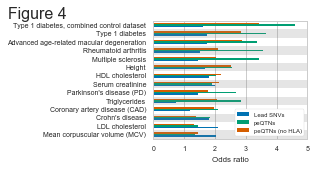

In [13]:
fig = plt.figure(figsize=(4.48, 2.5), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 1, 'Figure 4',
        size=16, va='top')
ciepy.clean_axis(ax)
ax.set_xticks([])
ax.set_yticks([])
gs.tight_layout(fig, rect=[0, 0.85, 1, 1])

# GWAS enrichment
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
t = grasp_res[(grasp_res[['lead_pvalue', 'pe_pvalue', 'pe_no_hla_pvalue']] < 0.05).sum(axis=1) > 0]
t = t[['lead_odds', 'pe_odds', 'pe_no_hla_odds']]
t['odds_sum'] = t.sum(axis=1)
t.sort_values(by='odds_sum', inplace=True)
t = t.drop('odds_sum', axis=1)
t.columns = ['Lead SNVs', 'peQTNs', 'peQTNs (no HLA)']
t.plot(kind='barh', ax=ax, legend=None, color=sns.color_palette('colorblind'), lw=0)
ax.legend(fontsize=6, loc='lower right', frameon=True, fancybox=True)
for i in range(t.shape[0])[::2]:
    ax.axhspan(-0.5 + i, 0.5 + i, facecolor='grey', alpha=0.2, lw=0)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(7)
ax.set_xlabel('Odds ratio', fontsize=8)
ax.set_ylabel('')
ax.grid(axis='y')
gs.tight_layout(fig, rect=[0, 0, 1, 0.92])

plt.savefig(os.path.join(outdir, 'gwas.pdf'))
plt.savefig(os.path.join(outdir, 'gwas.png'), dpi=300)